# Quote Web App

In [20]:
#Liby
import pandas as pd 
import numpy as np
from random import randrange
from datetime import datetime

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from flask import Flask, request
from markupsafe import escape

import matplotlib
import matplotlib.pyplot as plt

In [2]:
# pip install nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jonny\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Loading data

In [3]:
quotes = pd.read_csv("Data/quote_stash.csv")
quotes = quotes[['quote', 'author']]
quotes.head()

,quote,author
0,"Pain is inevitable, but misery is optional.",Tim Hansel
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard
2,Believe and act as if it were impossible to fail.,Charles Kettering
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt


In [4]:
#removing duplicates, if needed 
#quotes = quotes.drop_duplicates(subset="author", keep="last")

In [5]:
#checking amount data left
print(quotes.shape)
quotes.head()

(199, 2)


,quote,author
0,"Pain is inevitable, but misery is optional.",Tim Hansel
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard
2,Believe and act as if it were impossible to fail.,Charles Kettering
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt


## Building Blocks

In [6]:
for sentence in quotes['quote']:
    print(sentence)
    break

Pain is inevitable, but misery is optional.


In [7]:
#ranking sentiment
sid = SentimentIntensityAnalyzer()

all_compounds = []
for sentence in quotes['quote']:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}:{1}, '.format(k, ss[k]), end='')
        print()
        
        if k == 'compound':
            all_compounds.append(ss[k])

Pain is inevitable, but misery is optional.
compound:-0.802, 
neg:0.59, 
neu:0.41, 
pos:0.0, 
To avoid criticism, do nothing, say nothing, be nothing.
compound:-0.6249, 
neg:0.421, 
neu:0.579, 
pos:0.0, 
Believe and act as if it were impossible to fail.
compound:-0.5423, 
neg:0.28, 
neu:0.72, 
pos:0.0, 
Never get out of the boat. Absolutely goddamn right. Unless you were goin' all the way.
compound:-0.5256, 
neg:0.184, 
neu:0.816, 
pos:0.0, 
Nobody can make you feel inferior without your consent.
compound:-0.5213, 
neg:0.384, 
neu:0.616, 
pos:0.0, 
What we fear doing most is usually what we most need to do.
compound:-0.4939, 
neg:0.211, 
neu:0.789, 
pos:0.0, 
Everything you’ve ever wanted is on the other side of fear.
compound:-0.4939, 
neg:0.242, 
neu:0.758, 
pos:0.0, 
Success is going from failure to failure without losing your enthusiasm.
compound:-0.4805, 
neg:0.431, 
neu:0.287, 
pos:0.282, 
If there is no struggle, there is no progress.
compound:-0.4404, 
neg:0.462, 
neu:0.345, 
p

compound:-0.8176, 
neg:0.259, 
neu:0.698, 
pos:0.043, 
I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can't handle me at my worst, then you sure as hell don't deserve me at my best.
compound:-0.8598, 
neg:0.349, 
neu:0.5, 
pos:0.151, 
“The fear of death follows from the fear of life. A man who lives fully is prepared to die at any time.”
compound:-0.9189, 
neg:0.439, 
neu:0.494, 
pos:0.067, 
You only live once, but if you do it right, once is enough.
compound:0.0, 
neg:0.0, 
neu:1.0, 
pos:0.0, 
“Death ends a life, not a relationship.”
compound:0.0, 
neg:0.0, 
neu:1.0, 
pos:0.0, 
In three words I can sum up everything I've learned about life: it goes on.
compound:0.0, 
neg:0.0, 
neu:1.0, 
pos:0.0, 
“A thing is not necessarily true because a man dies for it.”
compound:-0.3252, 
neg:0.189, 
neu:0.811, 
pos:0.0, 
To live is the rarest thing in the world. Most people exist, that is all.
compound:0.0, 
neg:0.0, 
neu:

In [8]:
all_compounds[0:10]

[-0.802,
 -0.6249,
 -0.5423,
 -0.5256,
 -0.5213,
 -0.4939,
 -0.4939,
 -0.4805,
 -0.4404,
 -0.3612]

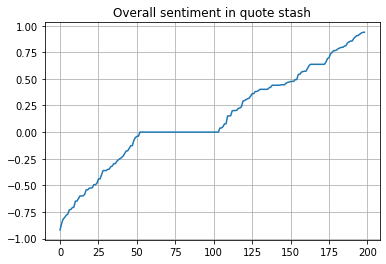

In [9]:
#ploting sentiments
plt.plot(sorted(all_compounds))
plt.title('Overall sentiment in quote stash')
plt.grid()

In [10]:
#Checking examples w/ column sentiment_score
quotes['sentiment_score'] = all_compounds
quotes.head()

,quote,author,sentiment_score
0,"Pain is inevitable, but misery is optional.",Tim Hansel,-0.8020
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard,-0.6249
2,Believe and act as if it were impossible to fail.,Charles Kettering,-0.5423
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard,-0.5256
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt,-0.5213


In [11]:
#Checking the most negative
np.min(quotes['sentiment_score'])

-0.9189

In [12]:
#most positive
np.max(quotes['sentiment_score'])

0.9382

In [13]:
#Checking most negative quote
quotes[quotes['sentiment_score'] == np.min(quotes['sentiment_score']) ]

,quote,author,sentiment_score
165,“The fear of death follows from the fear of li...,Mark Twain,-0.9189


In [14]:
#Checking most positive quote
quotes[quotes['sentiment_score'] == np.max(quotes['sentiment_score']) ]

,quote,author,sentiment_score
107,"When we are mindful, deeply in touch with the ...",Thich Nhat Hanh,0.9382


In [15]:
# the most negative
quotes[quotes['sentiment_score'] == np.max(quotes['sentiment_score']) ]['quote'].values

array(['When we are mindful, deeply in touch with the present moment, our understanding of what is going on deepens, and we begin to be filled with acceptance, joy, peace and love.'],
      dtype=object)

## Create quote movement

In [16]:
#Loading the quote stash and assigning an index score
# declare global variable
quotes = None

def prepare_sentiment_quote_stash(quote_stash_path):
    global quotes
    
    #Load the quote stash
    quotes = pd.read_csv(quote_stash_path)
    
    sid = SentimentIntensityAnalyzer()
    
    all_compounds = []
    for sentence in quotes['quote']:
        ss = sid.polarity_scores(sentence)
        for k in sorted(ss):
            if k == 'compound':
                all_compounds.append(ss[k])
            
    #adding sentiment to the data
    quotes['sentiment_score'] = all_compounds
    
    #creating ladder index
    quotes = quotes.sort_values('sentiment_score')
    quotes['index'] = [ix for ix in range(0, len(quotes))]
    
    return quotes

prepare_sentiment_quote_stash('Data/quote_stash.csv')
quotes.head()

,quote,author,sentiment_score,index
165,“The fear of death follows from the fear of li...,Mark Twain,-0.9189,0
164,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,-0.8598,1
163,“I'm the one that's got to die when it's time ...,Jimi Hendrix,-0.8176,2
0,"Pain is inevitable, but misery is optional.",Tim Hansel,-0.8020,3
188,"Sleep, those little slices of death — how I lo...",Edgar Allan Poe,-0.7806,4


In [17]:
#Handling user requests for new quotes, up or down the sentiment ladder
#up=brighter , down=darker
max_index_value = np.max(quotes['index'].values)

def gimme_a_quote(directions = None, current_index = None):
    rand_index = randrange(max_index_value)
    darker = None
    brighter = None
    
    #Creating new session visits
    if current_index is None:
        brighter = rand_index
        
    if directions == 'brighter':
        brighter = current_index
    else:
        darker = current_index
        
    if darker is not None:
        current_index = rand_index
        
        try:
            current_index = int(darker)
        except ValueError:
            # somebody trying to game the system
            current_index = rand_index
            
            
        if current_index > 0:
            #try for a lesser value than current one
            rand_index = randrange(0, current_index)
            print('darker')
        else:
            # already at lowest point so assign a new random of full set
            rand_index = rand_index
            
    elif brighter is not None:
        try:
            current_index = int(brighter)
        except ValueError:
            #somebody is gaming the system
            current_index = rand_index
            
        #try for a higher value than current one
        if current_index < max_index_value -1:
            rand_index = randrange(current_index, max_index_value)
            print('brighter')
        else:
            #already at highest point so assign a new random of full set
            rand_index = rand_index
            
    else:
        #grab a random value
        rand_index = rand_index
        
    return (rand_index)

gimme_a_quote('brighter', 20)

brighter


67

In [24]:
#checking bright quotes
quotes[quotes['index'] == gimme_a_quote('brighter', 77) ]

brighter


,quote,author,sentiment_score,index
128,Champions keep playing until they get it right.,Billie Jean King,0.6369,163


In [23]:
#checking dark quotes
quotes[quotes['index'] == gimme_a_quote('darker', 30) ]

darker


,quote,author,sentiment_score,index
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard,-0.6249,12


## Setting up Flask

In [22]:
#Testing flask basic
app = Flask(__name__)

@app.route('/')
def hello():
    utc_time = datetime.utcnow().strftime('Y%-%m-%d %H:%M:%S')
    return render_template("index.html", utc_time=utc_time)

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000 (Press CTRL+C to quit)
[2023-01-05 15:27:46,800] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "C:\Users\jonny\anaconda3\envs\dojo-env\lib\site-packages\flask\app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\jonny\anaconda3\envs\dojo-env\lib\site-packages\flask\app.py", line 1519, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\jonny\anaconda3\envs\dojo-env\lib\site-packages\flask\app.py", line 1517, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\jonny\anaconda3\envs\dojo-env\lib\site-packages\flask\app.py", line 1503, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "C:\Users\jonny\AppData\Local\Temp\ipykernel_19660\1792171696.py", line 6, in hello
    utc_time = datetime.utcnow().strftime('Y%-%m-%d %H:%M:%S')
ValueError: Invalid format string
127.0.0.1 - - 

In [76]:
#creating webap

bash: c: No such file or directory
